Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. In this project given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, and I am identifying the sentiment towards such companies or products in tweets. Here sentiments are bipolar i.e Positive, labelled as 0 and Negative labelled as 1

In [97]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Import packages
import os
os.chdir(r'/Users/harsh/Desktop/NLP Project')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re # for regular expressions 
import nltk # for text manipulation 
from nltk.tokenize import TweetTokenizer


In [109]:
#Reading Data file
its=pd.read_csv('Identify the sentiments.csv')

#Make copy of the dataset
itsc=its.copy()

## Preprocessing
### Data Inspection

,id,sentiment_type,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


Shape of Dataframe: (7920, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
id                7920 non-null int64
sentiment_type    7920 non-null int64
tweet             7920 non-null object
dtypes: int64(2), object(1)
memory usage: 185.7+ KB


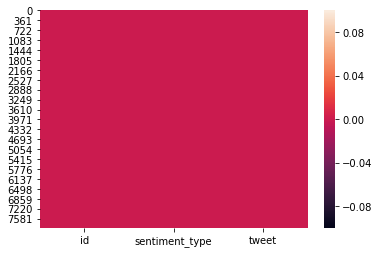

In [124]:
# checking the content of dataset
its.head(10)

#Renaming columns
its.columns=['id','sentiment_type','tweet']

#Exploring dataset Dimensions and info
print("Shape of Dataframe:",its.shape)

its.info()

#Exploring presence of null values
sns.heatmap(its.isnull()) # so, there is no null values

0    0.744192
1    0.255808
Name: sentiment_type, dtype: float64

(array([1.000e+00, 3.000e+00, 2.260e+02, 6.280e+02, 9.710e+02, 2.296e+03,
        2.702e+03, 2.400e+02, 9.900e+01, 6.100e+01, 7.900e+01, 8.800e+01,
        1.190e+02, 1.770e+02, 1.730e+02, 2.900e+01, 1.100e+01, 8.000e+00,
        5.000e+00, 4.000e+00]),
 array([  7.  ,  26.55,  46.1 ,  65.65,  85.2 , 104.75, 124.3 , 143.85,
        163.4 , 182.95, 202.5 , 222.05, 241.6 , 261.15, 280.7 , 300.25,
        319.8 , 339.35, 358.9 , 378.45, 398.  ]),
 <a list of 20 Patch objects>)

Text(0.5,1,'Tweet Length')

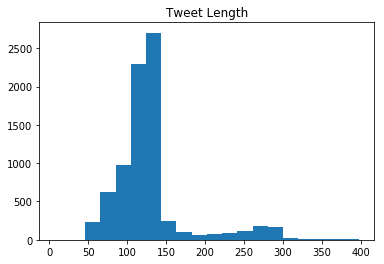

In [129]:
# Distribution of classes
its.sentiment_type.value_counts(normalize='True') #as positive are 75% and negative are 25% its imbalance classification problem

#Checking Distribution of length of the tweets in terms of words.
tweet_length=its.tweet.str.len()
plt.hist(tweet_length, bins=20)
plt.title("Tweet Length")
plt.show()

### Data Cleaning

In [122]:
#First lets see if dataset have any duplicates, which we will drop if found.
itsd=its.drop_duplicates()
print("After dropping duplicates dimension is:", itsd.shape) 
# same dimension shows that this data set do not have any duplicates.

After dropping duplicates dimension is: (7920, 3)


In [326]:
# Transforming tweets into Lower case
its['tidy_tweet']=its['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
its.head()

,id,sentiment_type,tweet,tidy_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case ^^ thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this! would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,i'm wired i know i'm george i was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service! apple won't even talk to...


In [354]:
#Function for Removing patterns
def pattern_remover(tweet, pattern):
    find = re.findall(pattern, tweet)
    for i in find:
        tweet = re.sub(i,'', tweet)  
    return tweet

In [355]:
# removing twitter handles (i.e. @user_name)
its['tidy_tweet'] = np.vectorize(pattern_remover)(its['tidy_tweet'], "@[\w]*")
its.head()

,id,sentiment_type,tweet,tidy_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case ^^ thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this! would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,i'm wired i know i'm george i was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service! apple won't even talk to...


In [357]:
#Removing urls and web addresses
its['tidy_tweet'] = np.vectorize(pattern_remover)(its['tidy_tweet'], "http\S+")
its.head()

error: unbalanced parenthesis at position 20

In [356]:
# removing special characters, numbers, punctuations
#its['tweet_tidy'] = its['tweet'].str.replace("[^a-zA-Z]", " ")
#its.head(20)